# Name:- Aamir Azim Ansari

# Predict the percentage of an student based on the no. of study hours.

Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
print('Libraries are imported successfuly')

Libraries are imported successfuly


Reading Data from the given url

In [5]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print('Data are imported Sucessfuly')

Data are imported Sucessfuly


Exploring Data

In [6]:
#last five data
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking Correlation between Hours and scores

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows High Correlation between Hours and Scores

Data Visualization

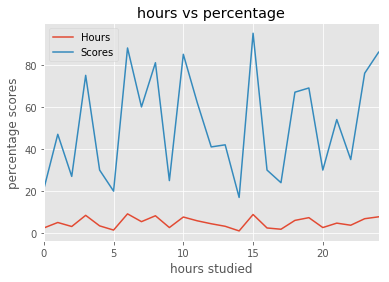

In [11]:
plt.style.use('ggplot')
df.plot(kind='line')
plt.title('hours vs percentage')
plt.xlabel('hours studied')
plt.ylabel('percentage scores')
plt.show()

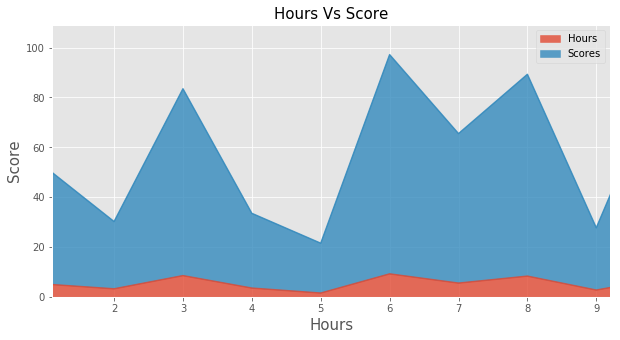

In [12]:
# Visualizing with area plot
xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours Vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

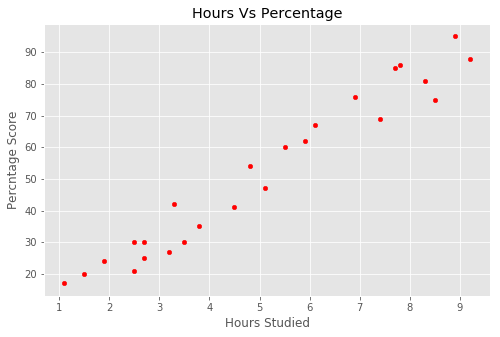

In [13]:
# Visualizing with scatter plot
df.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percntage Score')
plt.show()

Create a model

In [14]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

#using ttrain test spliit to split the data in train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

regressor = LinearRegression()
regressor.fit(train_x,train_y)

print('Training completed\n')
print('Coefficient: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)

Training completed

Coefficient:  [9.94061514]
Intercept:  1.5079104828268726


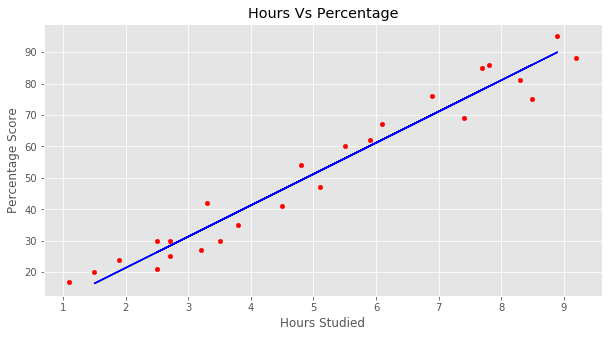

In [15]:
# we can also plot the fit line over the data in single linear regression
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(10,5),color='r')
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_,color='b')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

The blue Line is the best fit line for this data

Evaluating the model

In [16]:
#using metrics to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score: %.2f" %r2_score(y_pred,test_y))

Mean Absolute Error : 4.877039354964484
R2-score: 0.98


In [17]:
# comparing actual vs predicted
df2=pd.DataFrame({'actual': test_y,'Predicted' : y_pred})
df2

,actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


Predicted score of a student Studies for 9.25 hrs/day

In [20]:
hours=9.25
predicted_score=regressor.predict([[hours]])
print(f'Hours study per day ={hours}')
print(f'Predicted Score = {predicted_score[0]}')

Hours study per day =9.25
Predicted Score = 93.45860055685799


Conclusion :- If student studies 9.25hours/day then they obtained 93.45860055685799 predicted score.